In [1]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the DataSet
powerTrain=loadmat("powerTrainData.mat")
powerTrainInput=pd.DataFrame(powerTrain["powerTrainInput"])
powerTrainInput=powerTrainInput.T
powerTrainInput

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,3240.0,2546.7,2438.3,3240.0,3240.0,45.0,37.0,44.04,46.76,26.48,10.78,39.17,8.14,0.982,0.188
1,1871.0,1793.8,1709.7,2094.0,2094.0,61.0,57.0,66.67,65.48,52.67,48.92,70.00,72.26,-0.912,-0.409
2,1929.0,1873.0,1839.3,2177.0,2315.0,55.0,57.0,62.54,66.88,20.00,83.76,60.58,49.73,-0.857,-0.516
3,1837.0,1468.6,1551.5,1837.0,1956.0,55.0,56.0,61.08,68.12,26.43,66.07,58.96,21.26,-0.366,-0.931
4,2209.0,1777.8,1860.8,2209.0,2284.0,55.0,59.0,62.71,61.85,34.74,33.22,61.42,31.73,-0.218,-0.976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,3157.0,2214.5,2280.5,3157.0,3157.0,44.0,44.0,48.50,47.57,64.61,34.88,49.04,52.22,0.090,0.996
840,3238.0,2619.9,2593.2,3238.0,3267.0,40.0,37.0,40.12,38.81,5.42,31.96,38.96,9.09,0.982,0.188
841,1800.0,1432.0,1510.0,1800.0,1930.0,59.0,60.0,66.92,65.85,68.95,74.86,67.42,60.08,-0.882,0.471
842,2537.0,1960.5,2047.8,2537.0,2893.0,50.0,47.0,55.54,49.92,15.82,40.40,50.12,3.85,0.738,0.674


In [3]:
powerTrainOutput=pd.DataFrame(powerTrain["powerTrainOutput"])
powerTrainOutput=powerTrainOutput.T
powerTrainOutput

,0
0,3359
1,1868
2,1943
3,1900
4,2252
...,...
839,3055
840,3232
841,1787
842,2793


In [4]:
powerTrainInput,powerTrainOutput=shuffle(powerTrainInput,powerTrainOutput)

In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from numpy import set_printoptions
feature_selection=SelectKBest(score_func=f_regression,k=5)
feature_fit=feature_selection
best_features=feature_fit.fit(powerTrainInput,powerTrainOutput)
set_printoptions(precision=3)
print(feature_fit.scores_)
features=feature_fit.transform(powerTrainInput)
print(features[0:5,:])
#Showing the results in DataFrame
dfscores=pd.DataFrame(best_features.scores_)
dfcolums=pd.DataFrame(powerTrainInput.columns)
featureScores=pd.concat([dfcolums,dfscores],axis=1)
featureScores.columns=['Feature','Score']
print(featureScores.nlargest(18,'Score'))

[13237.536  4439.516  3804.236  9430.508  5701.734  3275.936  2457.259
  2704.82   2635.738   284.718   354.36   3465.859   209.962  2024.838
   101.843]
[[3103.  2298.2 2223.5 3103.  3103. ]
 [2146.  1707.5 1714.2 2146.  2527. ]
 [2040.  1652.5 1698.9 2070.  2296. ]
 [2816.  2198.  2476.4 2816.  3597. ]
 [2416.  1814.2 1688.1 2416.  2416. ]]
    Feature         Score
0         0  13237.536110
3         3   9430.508006
4         4   5701.733955
1         1   4439.515589
2         2   3804.235558
11       11   3465.858652
5         5   3275.935733
7         7   2704.819926
8         8   2635.738394
6         6   2457.258563
13       13   2024.838095
10       10    354.360381
9         9    284.717607
12       12    209.961751
14       14    101.843392


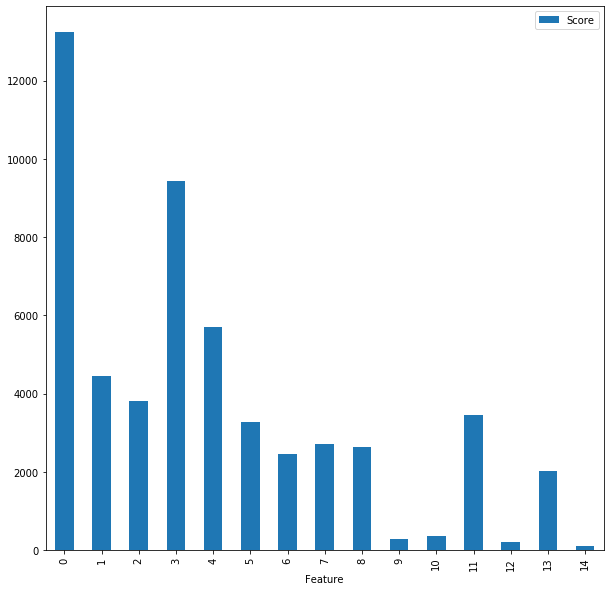

In [6]:
featureScores.plot(x='Feature',y='Score',kind='bar',figsize=(10,10))

In [7]:
powerTrainInput=powerTrainInput[[0,3,4,1,2,11,5,7,8,6,13]]
powerTrainInput

,0,3,4,1,2,11,5,7,8,6,13
515,3103.0,3103.0,3103.0,2298.2,2223.5,44.58,40.0,44.71,45.74,40.0,0.527
50,2146.0,2146.0,2527.0,1707.5,1714.2,59.79,54.0,54.79,54.89,49.0,-0.475
346,2040.0,2070.0,2296.0,1652.5,1698.9,66.21,62.0,61.83,55.09,57.0,-0.577
826,2816.0,2816.0,3597.0,2198.0,2476.4,47.29,45.0,46.58,40.01,45.0,0.773
779,2416.0,2416.0,2416.0,1814.2,1688.1,49.96,45.0,52.92,54.97,46.0,0.243
...,...,...,...,...,...,...,...,...,...,...,...
259,2788.0,2802.0,3061.0,2256.0,2254.3,43.79,40.0,49.67,47.12,44.0,0.783
511,3096.0,3535.0,3588.0,2704.2,2498.5,33.12,33.0,29.71,32.18,32.0,0.804
611,2697.0,2785.0,3139.0,2221.4,2188.9,54.21,56.0,49.83,49.20,52.0,0.625
7,2945.0,2945.0,2980.0,1978.5,2064.8,43.92,40.0,41.25,41.50,34.0,0.342


In [8]:
#Splitting the Data into train and test
X_train,X_test,y_train,y_test=train_test_split(powerTrainInput,powerTrainOutput,test_size=0.3,train_size=0.7)

In [9]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [12]:
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
test=[(KNeighborsRegressor(n_neighbors=10)),(LinearRegression()),(RandomForestRegressor(n_estimators = 500, random_state = 0)),(Ridge(alpha=0.01)),(Lasso(alpha=0.01)),(MLPRegressor(hidden_layer_sizes=(200, 200), solver="lbfgs", activation="relu"))]
for model in test: 
    cv_error=cross_val_score(model,X_train,y_train,cv=5,scoring='neg_mean_squared_error')
    print('Mean and SD of cross validation',np.mean(cv_error),np.std(cv_error))
    

Mean and SD of cross validation -10224.805576271185 2127.144669251227
Mean and SD of cross validation -7096.268391948872 1361.3425818158034
Mean and SD of cross validation -7843.9055171118625 1276.3696129123748
Mean and SD of cross validation -7095.635737922977 1359.640826739352
Mean and SD of cross validation -7094.818153133378 1359.605665734574
Mean and SD of cross validation -4184.99942851096 1420.4516997345418


In [24]:
from sklearn import metrics
regressor=MLPRegressor(hidden_layer_sizes=(500, 200), solver="lbfgs", activation="relu")
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 54.15154064129579
Mean Squared Error: 4769.057669365028
Root Mean Squared Error: 69.0583642245096
